 <span style="color:blue; font-size:2em">1- A description of the problem and a discussion of the background</span>.

 <span style="color:blue;font-size:1.3em">john is a business man who wants either to build Cafés or Restaurants in Obour city in Cairo. 
he has to choose between 2 districts (the2nd district or the 5th one) so he asked me to give him some data helps him take his decision </span>.

 <span style="color:blue; font-size:2em">2- A description of the data and how it will be used to solve the problem.</span>.

<span style="color:blue;font-size:1.3em">the data contains food and drinking places categories for both districts for example<ul><li>Italian Restaurants<li>Cafés<li>seafood Restaurnats </ul> the data contains how much likes each category in each district has</span>

 <span style="color:blue; font-size:2em">3- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did</span>

 <span style="color:blue;font-size:1.3em">i visualized results in the form of bar charts you can see the results in draw section</span>

## comparison between 2 districts in Obour city in Cairo regarding food and drinkig places (note: the forsquare data is poor so there might be unrealistic results)

<h2>You can just head to the draw section for quick evaluation or feel free to go through each line. i've provided beatiful comments;)</h2>

<h4>1- importing necessary tools</h4>

In [36]:
import requests
import pandas as pd
import numpy as np
import folium

In [37]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
from geopy.geocoders import Nominatim

<h4>2-Making necessary functions</h4>

In [39]:
#check for food-related categories if flase return none
def str_exist(whole, sub1, sub2, sub3):
    if whole == None:
        return None
    if ((sub1 in whole) or (sub2 in whole) or (sub3 in whole)):
        return whole
    else:
        return None

<h4>The following function will take directly the respond of the foursquare API json file and return preprocessed data frame</h4>

In [114]:
def wrangle_data(jsonresult):   
    #get venues
    venues = jsonresult['response']['venues']
    #turn json to df
    venues_df = pd.io.json.json_normalize(venues)
    #filter columns
    venues_df = venues_df[["name", "location.lat", "location.lng", "categories", "id"]]
    #get category name for each venue
    #x >> category list of each venue
    venues_df['categories'] = venues_df['categories'].apply(lambda x : x[0]["name"] if (len(x) !=0 ) else None)
    #keep all food related cates and turn None for non-food-cates (cates = categories)
    venues_df['categories'] = venues_df['categories'].apply(str_exist,                                                                  
                                                            sub1="Restaurant",
                                                            sub2="Café",
                                                            sub3="Cafeteria")
    #drop None category venues
    venues_df.dropna(inplace=True)
    #reindex the df
    venues_df.index = list(range(len(venues_df.index)))
    #filter columns
    venues_df.drop(["name","location.lat","location.lng"], axis=1, inplace=True)
    
    return venues_df

<h4>adding likes column to venues df</h4>

In [144]:
#add likes column
def add_likes(venues_df, likes_list):    
    #inseter likes columns
    venues_df.insert(len(venues_df.columns), "likes", likes_list, True)
    #drop columns with 0 likes
    df_likes = venues_df[venues_df['likes'] != 0]
    #drop id column
    df_likes.drop(['id'], axis=1, inplace=True)
    df_likes.index = list(range(len(df_likes.index)))
    return df_likes

In [83]:
client_id = "TJLFDW5NONEAYZ2STSVV2IWCPQYRXLP0WG2Z02WU3CGX0W0E"
client_secret = "HHJAJ0OCPCAWEG2D4Q2FMMEGD0JVC3CRAK5FUEPTKMOH2YCS"

<h4>Second district,Obour City , Cairo info</h4>

In [84]:
lat_sec_dis, lng_sec_dis = 30.249424, 31.479371
ll_sec_dis = (lat_sec_dis, lng_sec_dis)
radius = 5000 
limit = 5000
version = '20200724'

url_sec_dis_venues="https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
    client_id,
    client_secret,
    version,
    lat_sec_dis,
    lng_sec_dis,
    radius,
    limit
)



In [85]:
#show second district in Obour City Cairo
#
second_district_map = folium.Map(location=(ll_sec_dis), zoom_start=15)
marker_sec_dis = folium.features.CircleMarker(ll_sec_dis, radius=5, popup="Second District, Obour City")
marker_sec_dis.add_to(second_district_map)
second_district_map

In [86]:
#getting second district info 
results_sec_dis = requests.get(url_sec_dis_venues).json()

In [147]:
#data wrangling
venues_sec_dis_df = wrangle_data(results_sec_dis)
venues_sec_dis_df.head()

,categories,id
0,Syrian Restaurant,523dac1711d2ba03a00f19db
1,Café,535d3647498e0f645e7f44a9
2,Café,5ba92f2c4c954c002cea351e
3,Cafeteria,569bde1d38fa14282bddb55b
4,Middle Eastern Restaurant,537227b4498e57721d4e09e4


In [88]:
ACCESS_TOKEN = 'ZFZH05SBAKUFKQOKH4YGG2TM25FO3SIWJZGPFM10L1J3DLFL'
unlike = 0
like = 1

In [89]:
#check if Api properly responded
if requests.post(url_sec_dis_venues_likes).json()['meta']['code'] == 200:
    print("ready to get likes")
else:
    print("error code is",
         requests.post(url_sec_dis_venues_likes).json()['meta']['code'])


ready to get likes


In [90]:
#get likes of venues based on ids
list_likes_sec_dis =[]
for index, ID in enumerate(venues_sec_dis_df['id']):
    url_sec_dis_venues_likes = "https://api.foursquare.com/v2/venues/{}/like?client_id={}&client_secret={}&oauth_token={}&set={}&v={}".format(
    ID,
    client_id,
    client_secret,
    ACCESS_TOKEN,
    unlike,
    version,  
)
    list_likes_sec_dis.append(requests.post(url_sec_dis_venues_likes).json()['response']['likes']['count'])

<h4>add likes column to venues df</h4>

In [148]:
venues_sec_dis_likes_df = add_likes(venues_sec_dis_df, list_likes_sec_dis)
venues_sec_dis_likes_df

,categories,likes
0,Syrian Restaurant,23
1,Syrian Restaurant,1
2,Syrian Restaurant,4
3,Restaurant,1
4,Café,1
5,Café,1
6,Café,1
7,Kebab Restaurant,4
8,Café,1


In [92]:
#groub df by cates sum of likes
venues_sec_dis_likes_df_by_sum = venues_sec_dis_likes_df.groupby(by="categories").sum()
#reset index
venues_sec_dis_likes_df_by_sum = venues_sec_dis_likes_df_by_sum.reset_index()
venues_sec_dis_likes_df_by_sum.head()

,categories,likes
0,Café,4
1,Kebab Restaurant,4
2,Restaurant,1
3,Syrian Restaurant,28


In [93]:
#group df by cates count of freq
venues_sec_dis_likes_df_by_count = venues_sec_dis_likes_df.groupby(by="categories").count()
#REset index
venues_sec_dis_likes_df_by_count = venues_sec_dis_likes_df_by_count.reset_index()
#rename columns
venues_sec_dis_likes_df_by_count = venues_sec_dis_likes_df_by_count.rename(columns={"likes": "freq"})
venues_sec_dis_likes_df_by_count

,categories,freq
0,Café,4
1,Kebab Restaurant,1
2,Restaurant,1
3,Syrian Restaurant,3


<h1>we will apply all of the previous steps for Fifth district of Obour City too!</h1>

In [94]:
lat_5th_dis, lng_5th_dis = 30.222608, 31.474366
ll_5th_dis = (lat_5th_dis, lng_5th_dis)
radius = 5000 
limit = 5000
version = '20200724' 

url_5th_dis_venues="https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
    client_id,
    client_secret,
    version,
    lat_5th_dis,
    lng_5th_dis,
    radius,
    limit
)
url_5th_dis_venues

'https://api.foursquare.com/v2/venues/search?&client_id=TJLFDW5NONEAYZ2STSVV2IWCPQYRXLP0WG2Z02WU3CGX0W0E&client_secret=HHJAJ0OCPCAWEG2D4Q2FMMEGD0JVC3CRAK5FUEPTKMOH2YCS&v=20200724&ll=30.222608,31.474366&radius=5000&limit=5000'

In [95]:
#show fifth  disrtict
#
fifth_district_map = folium.Map(location=(ll_5th_dis), zoom_start=15)
marker_5th_dis = folium.features.CircleMarker(ll_5th_dis, radius=5, popup="Fifth District, Obour City")
marker_5th_dis.add_to(fifth_district_map)
fifth_district_map

In [56]:
#request venues
results_5th_dis = requests.get(url_5th_dis_venues).json()

In [149]:
venues_5th_dis_df = wrangle_data(results_5th_dis)
venues_5th_dis_df.head()

,categories,id
0,Fast Food Restaurant,4f6eeae6e4b07a4bc5cc7cad
1,Café,535d3647498e0f645e7f44a9
2,Cafeteria,569bde1d38fa14282bddb55b
3,Café,5ba92f2c4c954c002cea351e
4,Italian Restaurant,4e6c12081495f3492564a5d3


In [97]:
#get venues likes
list_likes_5th_dis =[]
for index, ID in enumerate(venues_5th_dis_df['id']):
    url_5th_dis_venues_likes = "https://api.foursquare.com/v2/venues/{}/like?client_id={}&client_secret={}&oauth_token={}&set={}&v={}".format(
    ID,
    client_id,
    client_secret,
    ACCESS_TOKEN,
    unlike,
    version,  
)
    list_likes_5th_dis.append(requests.post(url_5th_dis_venues_likes).json()['response']['likes']['count'])

In [150]:
venues_5th_dis_likes_df = add_likes(venues_5th_dis_df, list_likes_5th_dis)
venues_5th_dis_likes_df

,categories,likes
0,Fast Food Restaurant,15
1,Italian Restaurant,1
2,Syrian Restaurant,1
3,Syrian Restaurant,23
4,Middle Eastern Restaurant,1
5,Egyptian Restaurant,2
6,Syrian Restaurant,4
7,Café,1
8,Restaurant,1
9,Café,2


In [99]:
#group veneus by cates sum of likes
venues_5th_dis_likes_df_by_sum = venues_5th_dis_likes_df.groupby(by="categories").sum()
#reindex
venues_5th_dis_likes_df_by_sum = venues_5th_dis_likes_df_by_sum.reset_index()

In [100]:
venues_5th_dis_likes_df_by_sum.head()

,categories,likes
0,Café,9
1,Egyptian Restaurant,2
2,Fast Food Restaurant,18
3,Italian Restaurant,1
4,Kebab Restaurant,4


In [101]:
#gruop venues by cates count of freq
venues_5th_dis_likes_df_by_count = venues_5th_dis_likes_df.groupby(by="categories").count()
#reindex
venues_5th_dis_likes_df_by_count = venues_5th_dis_likes_df_by_count.reset_index()
#rename columns
venues_5th_dis_likes_df_by_count = venues_5th_dis_likes_df_by_count.rename(columns={"likes": "freq"})

In [102]:
venues_5th_dis_likes_df_by_count.head()

,categories,freq
0,Café,3
1,Egyptian Restaurant,1
2,Fast Food Restaurant,2
3,Italian Restaurant,1
4,Kebab Restaurant,1


<h1>draw</h1>

<h4>the goals of the graphs are</h4>:<h5><ul>
    <li>show you how many of each food places types  are there in districts for example<ul><li>3 Cafes in 2nd district, 4 cafés in 5th district</li><li>2 seafood restaurants in 2nd district, 5 seafood restaurants in 5th district</li><li>etc....</li></ul><li>show you how many likes each type takes in each district</li></li>
    </ul></h5>

In [103]:
cates_nums_5th = venues_5th_dis_likes_df_by_count.set_index("categories")
cates_nums_sec = venues_sec_dis_likes_df_by_count.set_index("categories")

In [104]:
cates_nums_5th = list(cates_nums_5th["freq"])
cates_nums_sec = list(cates_nums_sec["freq"])

In [105]:
indx = np.arange(len(cates_nums_5th))

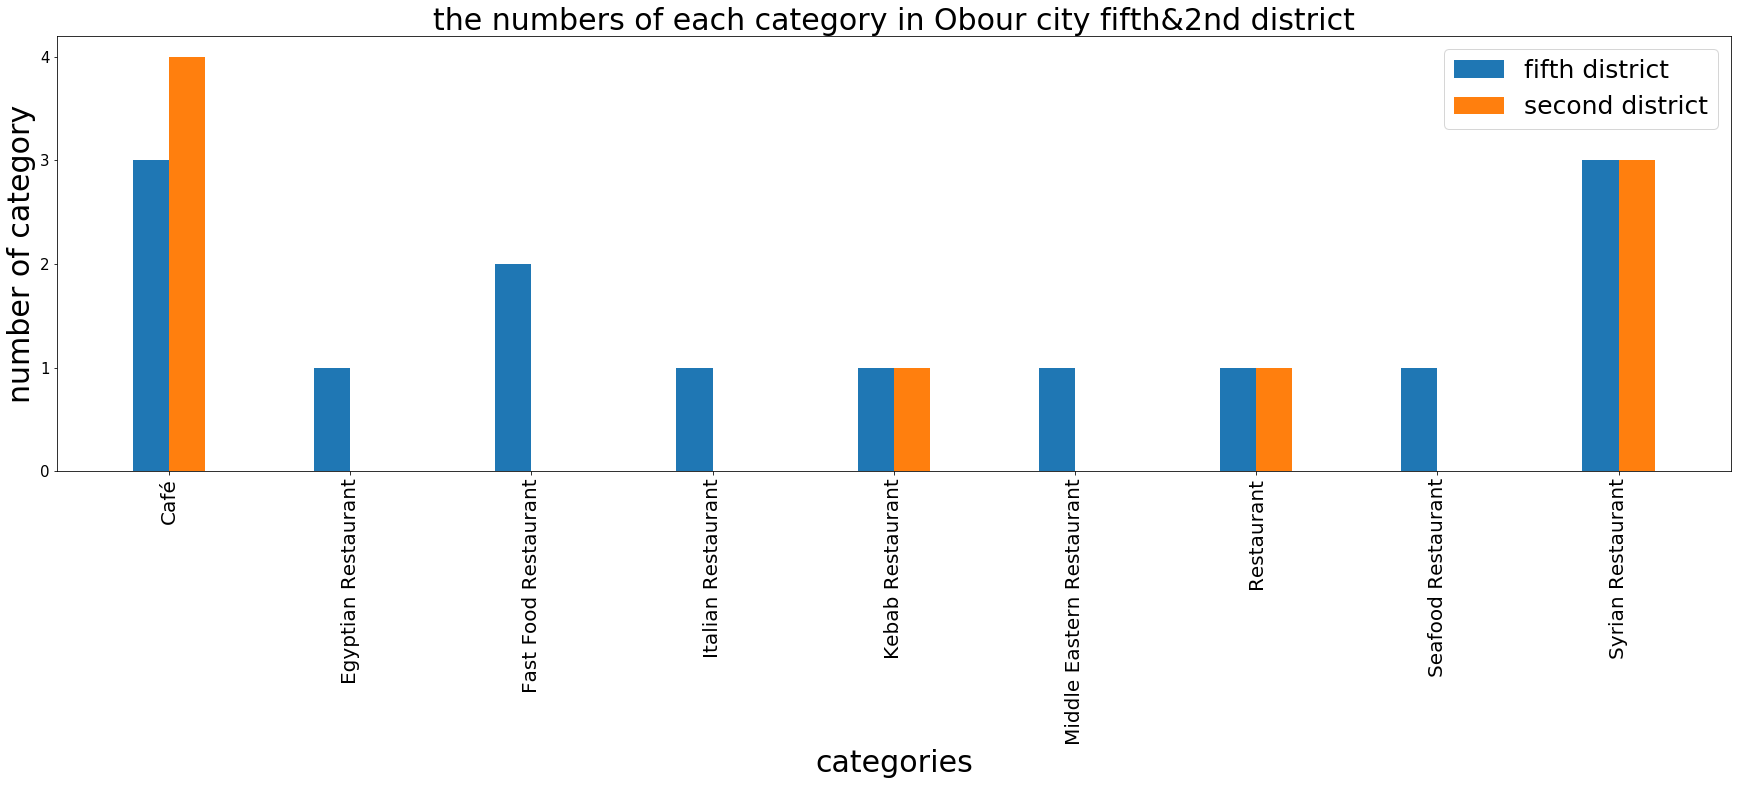

In [106]:
fig = plt.figure(figsize=(30,8),)
ax2 = fig.add_subplot(111)
barwidth=0.2

plt.xticks(rotation=90, fontsize=20)
ax2.set_xticks(indx)

ax2.set_xticklabels(venues_5th_dis_likes_df_by_count.set_index("categories").index)
plt.yticks(fontsize=15)
ax2.set_yticks(list(range(15)))
ax2.set_title("the numbers of each category in Obour city fifth&2nd district", fontsize=30)
ax2.set_xlabel("categories", fontsize=30)
ax2.set_ylabel("number of category", fontsize=30)
ax2.bar(indx - barwidth/2, cates_nums_5th, barwidth, label="fifth district")
ax2.bar(np.array([0,4,6,8]) + barwidth/2, cates_nums_sec, barwidth,label="second district")
ax2.legend(prop={'size':25})

 <span style="color:blue; font-size:2em">Results section where you discuss the results</span>
<h4>
    from the above plot we can tell
    <ul>
        <li>there are no Egyptian Restaurants in second district <h7>(this not real but the foursquare data is poor)</h7>
        <li>number of Cafés in 2nd district is greater than 5th district
    </ul>    
</h4>

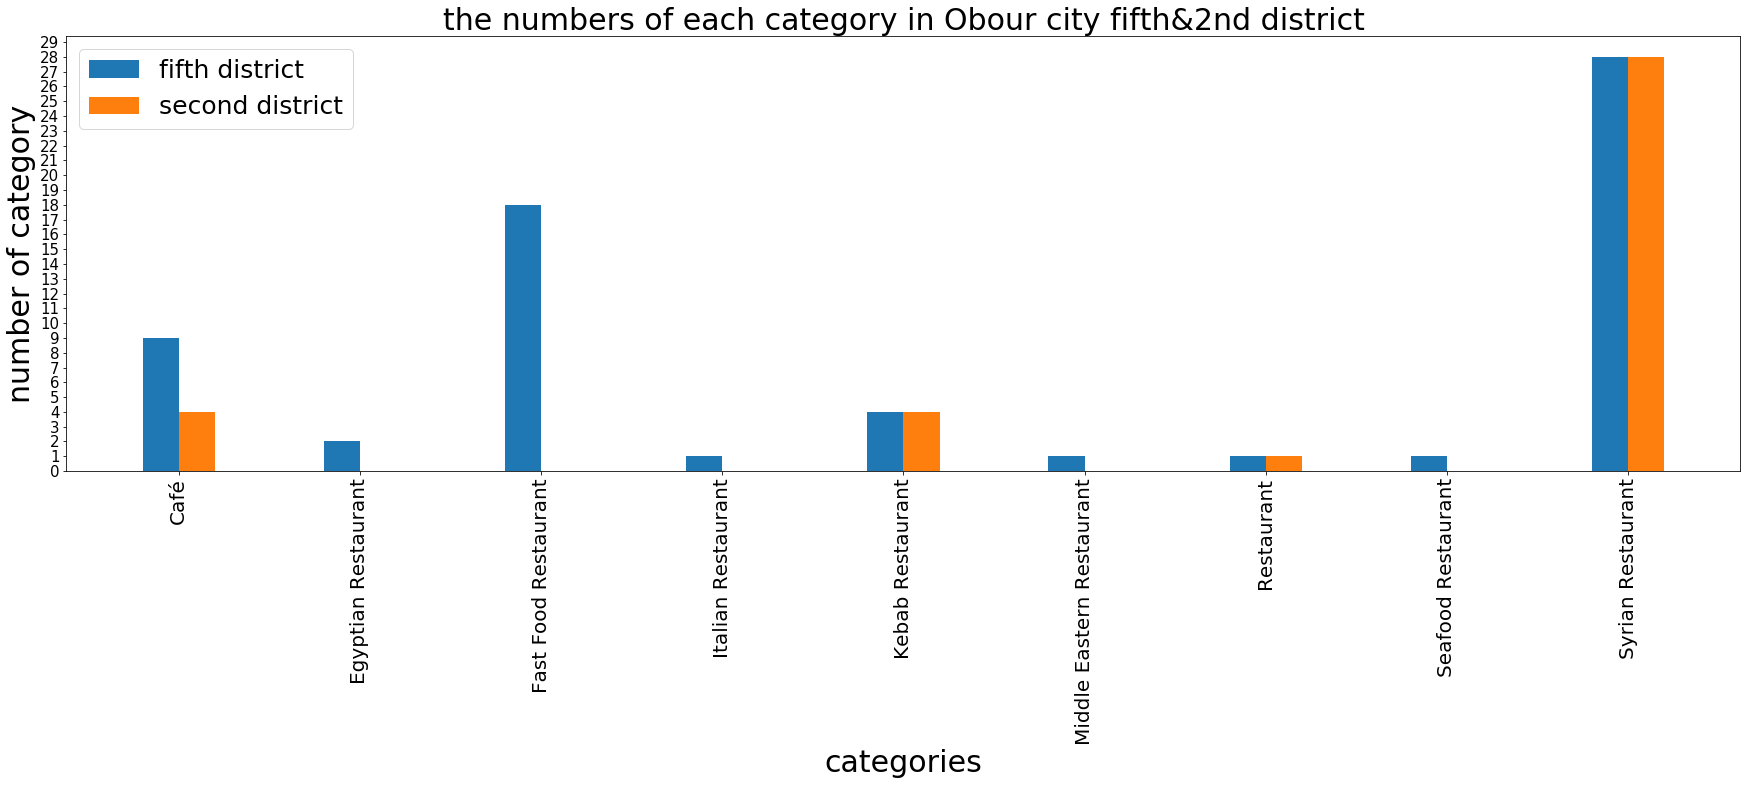

In [107]:
fig = plt.figure(figsize=(30,8),)
ax2 = fig.add_subplot(111)
barwidth=0.2

plt.xticks(rotation=90, fontsize=20)
ax2.set_xticks(indx)

ax2.set_xticklabels(venues_5th_dis_likes_df_by_count.set_index("categories").index)
plt.yticks(fontsize=15)
ax2.set_yticks(list(range(30)))
ax2.set_title("the numbers of each category in Obour city fifth&2nd district", fontsize=30)
ax2.set_xlabel("categories", fontsize=30)
ax2.set_ylabel("number of category", fontsize=30)
ax2.bar(indx - barwidth/2, venues_5th_dis_likes_df_by_sum["likes"], barwidth, label="fifth district")
ax2.bar(np.array([0,4,6,8]) + barwidth/2, venues_sec_dis_likes_df_by_sum["likes"], barwidth,label="second district")
ax2.legend(prop={'size':25})

 <span style="color:blue; font-size:2em">Results section where you discuss the results</span>
<h4>
    from the above plot we can tell
    <ul>
        <li>number of likes of Syrian Restaurants in 2nd district is equal to 5th district
        <li>number of likes of Cafés in 2nd district is less than 5th district
    </ul>    
</h4>

 <span style="color:blue; font-size:2em">Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.</span>

<h4><ul>based on the results<li> the fifth district has much more food areas and much more likes for food areas so it's a good place to build a restaurant.
<li> the fifth district has more Cafes but less likes for Cafés.</ul>
</h4>

 <span style="color:blue; font-size:2em">Conclusion </span>

<h4>based on results and observations the best choice is to build restaurant in fifth district</h4>